<a href="https://colab.research.google.com/github/narutsoo/tutorial/blob/master/RFM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference

*   https://towardsdatascience.com/recency-frequency-monetary-model-with-python-and-how-sephora-uses-it-to-optimize-their-google-d6a0707c5f17
*   https://www.kaggle.com/code/fabiendaniel/customer-segmentation/data



In [3]:
!pip install squarify

In [36]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import squarify

import seaborn as sns

In [8]:
df = pd.read_csv("data.csv", encoding = "ISO-8859-1")

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [15]:
df['CustomerID'].nunique()

4372

In [21]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [19]:
df.shape

(541909, 8)

In [22]:
df['TotalSum'] = df['Quantity']*df['UnitPrice']

In [23]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [26]:
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)
print (snapshot_date)

2011-12-10 12:50:00


In [27]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [29]:
data_process = df.groupby(["CustomerID"]).agg({"InvoiceDate":lambda x: (snapshot_date - x.max()).days,
                                               "InvoiceNo":'count',
                                               "TotalSum":'sum'})

In [38]:
data_process = data_process.rename(columns ={"InvoiceDate":"Recency",
                              "InvoiceNo":"Frequency",
                              "TotalSum":"Monetary"}
                    )

In [39]:
data_process

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [33]:
df[df["CustomerID"] == 12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


In [34]:
plt.figure(figsize=(12,10))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Recency')

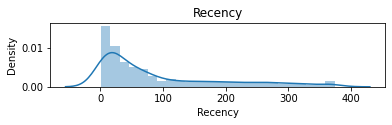

In [44]:
plt.subplot(3,1,1)
sns.distplot(data_process['Recency'])
plt.title("Recency")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency')

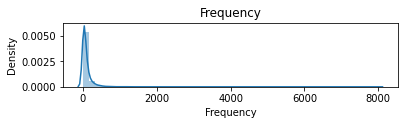

In [45]:
plt.subplot(3,1,2)
sns.distplot(data_process['Frequency'])
plt.title("Frequency")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Monetary')

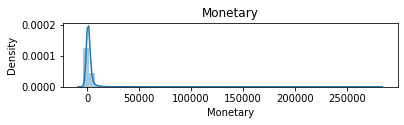

In [46]:
plt.subplot(3,1,3)
sns.distplot(data_process['Monetary'])
plt.title("Monetary")

In [51]:
r_labels = range(4,0,-1)
f_labels = range(1,5)

In [49]:
for i in r_labels:
  print (i)

4
3
2
1


In [52]:
for i in f_labels:
  print (i)

1
2
3
4


In [53]:
r_groups = pd.qcut(data_process["Recency"], q=4, labels=r_labels)

f_groups = pd.qcut(data_process["Frequency"], q=4, labels=f_labels)

In [55]:
data_process = data_process.assign(R=r_groups.values, F=f_groups.values)

In [56]:
data_process.head()

,Recency,Frequency,Monetary,R,F
CustomerID,,,,,
12346.0,326,2,0.00,1,1
12347.0,2,182,4310.00,4,4
12348.0,75,31,1797.24,2,2
12349.0,19,73,1757.55,3,3
12350.0,310,17,334.40,1,1


In [57]:
m_labels = range(1,5)

In [58]:
m_groups = pd.qcut(data_process["Monetary"], q=4, labels=m_labels)

In [59]:
data_process = data_process.assign(M = m_groups.values)

In [60]:
data_process.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


In [67]:
data_process["RFM_Segment_Concat"] = data_process['R'].astype(str) + data_process['F'].astype(str) + data_process['M'].astype(str)

In [69]:
data_process

,Recency,Frequency,Monetary,R,F,M,RFM_Segment_Concat
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,111
12347.0,2,182,4310.00,4,4,4,444
12348.0,75,31,1797.24,2,2,4,224
12349.0,19,73,1757.55,3,3,4,334
12350.0,310,17,334.40,1,1,2,112
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111
18281.0,181,7,80.82,1,1,1,111
18282.0,8,13,176.60,4,1,1,411


In [70]:
data_process["RFM_Segment_Concat"].nunique()

62

In [71]:
data_process["RFM_Score"] = data_process[["R","F","M"]].sum(axis=1)

In [72]:
data_process.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment_Concat,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3
12347.0,2,182,4310.00,4,4,4,444,12
12348.0,75,31,1797.24,2,2,4,224,8
12349.0,19,73,1757.55,3,3,4,334,10
12350.0,310,17,334.40,1,1,2,112,4


In [73]:
def rfm_level(df):
  if df["RFM_Score"] >=9:
    return "Can\'t loose them"
  elif (df["RFM_Score"] >=8 and df["RFM_Score"] <9):
    return "Champions"
  elif (df["RFM_Score"] >=7 and df["RFM_Score"] <8):
    return "Loyal"
  elif (df["RFM_Score"] >=6 and df["RFM_Score"] <7):
    return "Potential"
  elif (df["RFM_Score"] >=5 and df["RFM_Score"] <6):
    return "Promising"
  elif (df["RFM_Score"] >=4 and df["RFM_Score"] <5):
    return "Needs Attention"
  else:
    return "Require Attention"

In [74]:
data_process["RFM_Level"] = data_process.apply(rfm_level, axis=1)

In [75]:
data_process.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3,Require Attention
12347.0,2,182,4310.00,4,4,4,444,12,Can't loose them
12348.0,75,31,1797.24,2,2,4,224,8,Champions
12349.0,19,73,1757.55,3,3,4,334,10,Can't loose them
12350.0,310,17,334.40,1,1,2,112,4,Needs Attention


In [81]:
data_process_agg = data_process.groupby("RFM_Level").agg({"Recency":"mean",
                                       "Frequency":"mean",
                                       "Monetary":["mean", "count"]}).round(1)

In [82]:
data_process_agg.columns

MultiIndex([(  'Recency',  'mean'),
            ('Frequency',  'mean'),
            ( 'Monetary',  'mean'),
            ( 'Monetary', 'count')],
           )

In [94]:
data_process_agg.columns = data_process_agg.columns.droplevel()

In [98]:
data_process_agg.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']

In [99]:
data_process_agg

,RecencyMean,FrequencyMean,MonetaryMean,Count
RFM_Level,,,,
Can't loose them,25.2,195.1,4130.3,1690
Champions,62.7,57.0,974.7,467
Loyal,78.8,39.7,724.2,447
Needs Attention,174.5,13.9,227.1,391
Potential,94.3,28.5,491.8,468
Promising,153.0,21.2,346.8,517
Require Attention,264.8,7.8,109.1,392


In [101]:
data_process_agg.index

Index(['Can't loose them', 'Champions', 'Loyal', 'Needs Attention',
       'Potential', 'Promising', 'Require Attention'],
      dtype='object', name='RFM_Level')

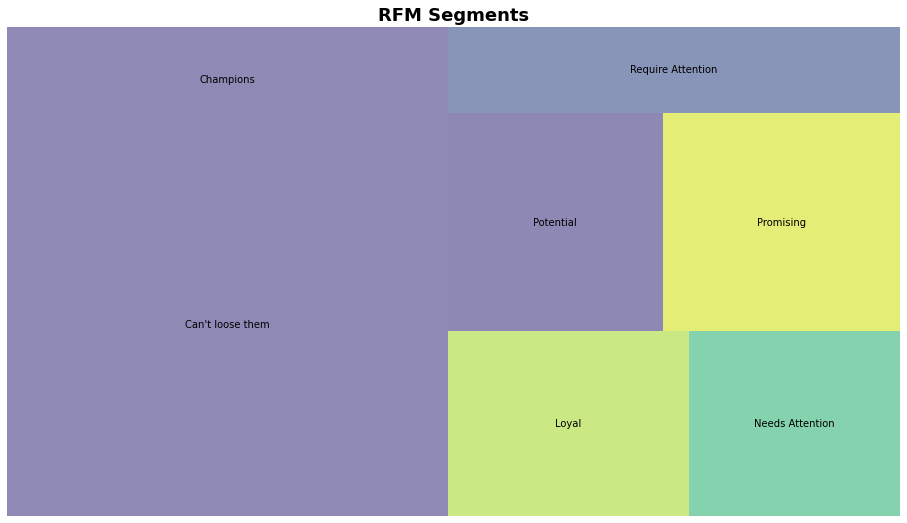

In [104]:
fig = plt.gcf()
ax = fig.add_subplot()

fig.set_size_inches(16,9)

squarify.plot(sizes=data_process_agg["Count"],
              label=['Can\'t loose them', 'Champions', 'Loyal', 'Needs Attention','Potential', 'Promising', 'Require Attention'],
                     alpha=.6)
              
plt.title("RFM Segments", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()